In [1]:
# Importing Libraries 

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPool2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.applications import ResNet50V2 as ResNet
from tensorflow.keras.callbacks import EarlyStopping,  ReduceLROnPlateau
from tensorflow.keras.models import load_model

import cv2
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc = {'figure.figsize':(11.7, 8.27)})
palette = sns.color_palette("bright", 28)

import random
import os

import imutils
from imutils.contours import sort_contours

In [2]:
# Defining the function to extract images

def extractImages(datadir):
    # Extracting the data
    imagesData = []
    imagesLabel = []
    for folder in os.listdir(datadir):
        path = os.path.join(datadir, folder)
        for images in os.listdir(path):
            img = cv2.imread(os.path.join(path, images), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (32, 32))
            imagesData.append(img)
            imagesLabel.append(folder)

    # Shuffle Data
    combined = list(zip(imagesData, imagesLabel))
    random.shuffle(combined)
    imagesData, imagesLabel = zip(*combined)

    return (imagesData, imagesLabel)

In [5]:
# importing Training Data
imagesData = []
imagesLabel = []
train_data_dir = 'data/data/dataset'
imagesData, imagesLabel = extractImages(train_data_dir)

In [6]:
print("number of images: ", len(imagesData))
print("Shape of images: ", imagesData[1].shape)
print("labels: ", list(set(imagesLabel)))

number of images:  7600
Shape of images:  (32, 32)
labels:  ['3', 'add', '6', '7', '0', '9', '8', 'sub', 'div', '1', '4', 'mul', '5', '2']


In [7]:
imagesTrainData, imagesTestData, imagesTrainLabel, imagesTestLabel = train_test_split(
    imagesData, imagesLabel,
    shuffle = True,
    test_size = 0.2,
    random_state = 42,
    stratify = imagesLabel
)

In [10]:
# Creating a function to Show Sample images
def show_images (images,label,part):
    figure = plt.figure(figsize=((len(part)/10 + 1)*10, (len(part)/10 + 1)*2))
    j = 0
    for i in part:
        lbl = label[i]
        img = images[i]
        img = cv2.resize(img, (256, 256))
        figure.add_subplot(int(len(part)/10)+1, 10, j+1)
        plt.imshow(img,cmap='gray')
        plt.axis('off')
        plt.title(lbl)
        j += 1

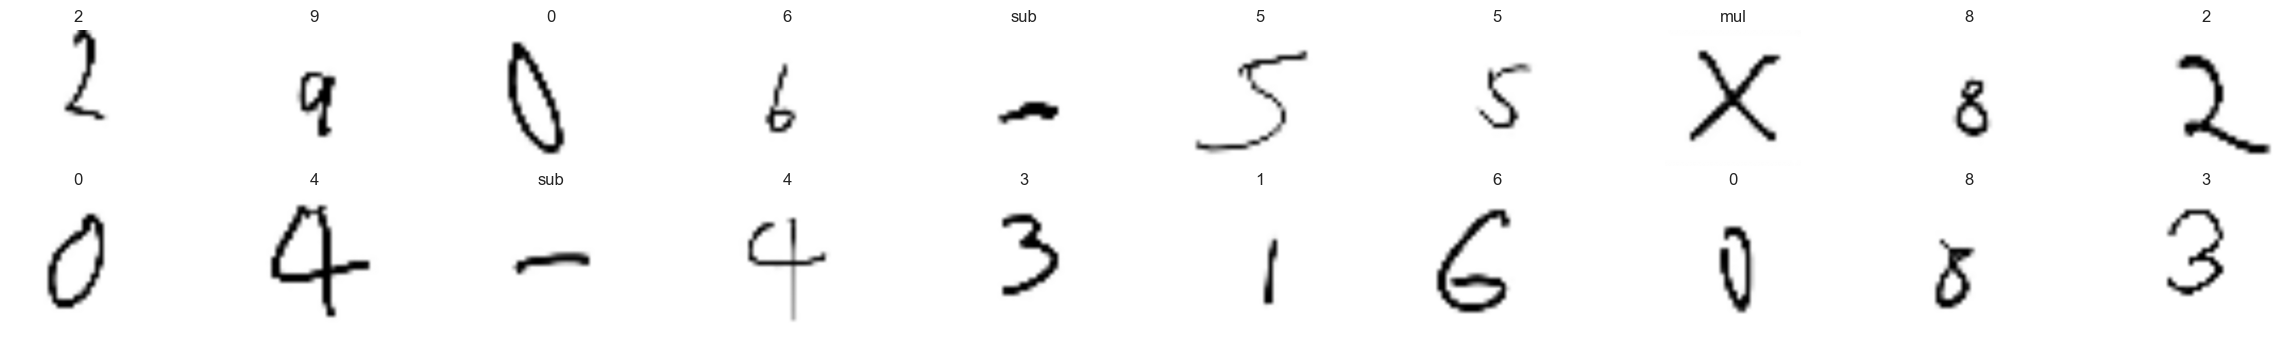

In [11]:
show_images(imagesTrainData, imagesTrainLabel, range(20))

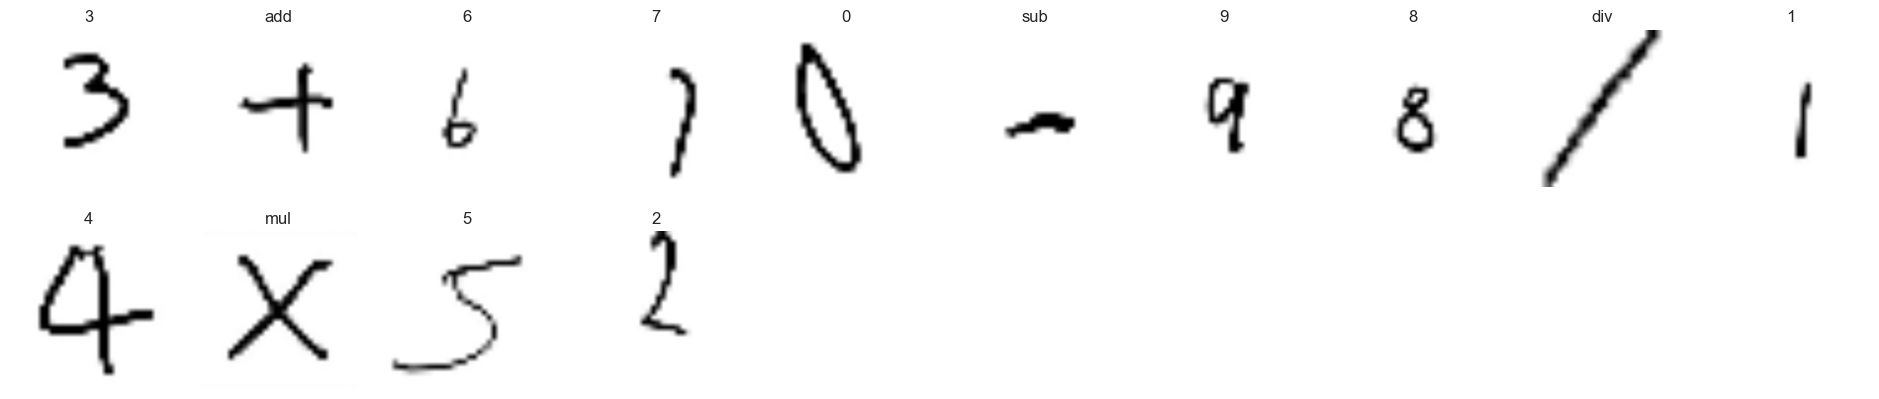

In [13]:
unique_idx = [imagesTrainLabel.index(i) for i in list(set(imagesTrainLabel))]
show_images(imagesTrainData, imagesTrainLabel, unique_idx)

<Axes: ylabel='count'>

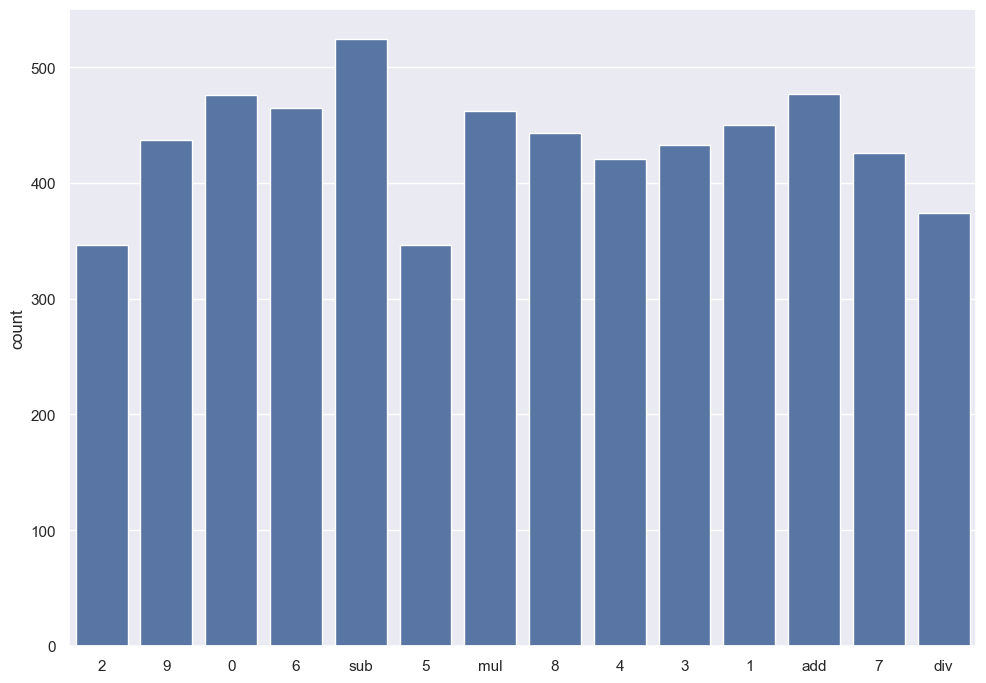

In [14]:
sns.countplot(x = list(imagesTrainLabel))

In [15]:
label_encoder = LabelEncoder()
Y_train = label_encoder.fit_transform(imagesTrainLabel)
Y_test = label_encoder.transform(imagesTestLabel)

In [16]:
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [17]:
X_train = np.array(imagesTrainData)
X_test = np.array(imagesTestData)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [18]:
X_train = np.expand_dims(X_train, axis = -1)
X_test = np.expand_dims(X_test, axis = -1)
X_train = X_train/255.
X_test = X_test/255.

In [19]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_train.shape)

(6080, 32, 32, 1)
(1520, 32, 32, 1)
(6080, 14)
(6080, 14)


In [20]:
X_train[0].shape

(32, 32, 1)

In [21]:
def facial_recognition_detect_mood(input_shape=(32, 32, 1)):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), padding = 'same', activatio = 'relu', input_shape = input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, kernel_size=(3, 3), activation = 'relu', padding = 'same', kernel_regularizer = regularizer.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1024, activation = 'relu'))
    model.add(Dropout(0.5))

    model.add(Dense(14, activation = 'softmax'))
    model.compile(optimizer = Adam(lr = 0.0001,),
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])
    return model

In [22]:
def facial_recognition_detect_mood(input_shape=(32, 32, 1)):


    model = Sequential()

    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape =input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(14, activation='softmax'))

    # Here I'll be using learning_rate instead of lr
    model.compile(optimizer = Adam(learning_rate=0.0001),
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])
    return model

In [23]:
model = facial_recognition_detect_mood()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       36992     
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 128)       5

In [29]:
# Defining Step Decay for Epochs


def step_decay(epoch):
    initial_learning_rate = 0.001
    dropEvery = 10
    factor = 0.5
    lr = initial_learning_rate*(factor**np.floor((1 + epoch)/dropEvery))
    return float(lr)


In [30]:
checkpoint = ModelCheckpoint('HandwrittenMathEquationModel.keras',
                             monitor='val_accuracy',
                             save_best_only=True,
                             verbose=1,
                             mode='min')

earlyStopping = EarlyStopping(monitor='val_accuracy',
                              mode='auto',
                              verbose=1,
                              patience=10,
                              restore_best_weights=True)

reduceLr = ReduceLROnPlateau(monitor='val_accuracy',
                              factor=0.2,
                              patience=6,
                              verbose=1,
                              min_delta=0.0001)

callbacks = [checkpoint,earlyStopping,reduceLr, LearningRateScheduler(step_decay)]

In [31]:
# Assuming We Want basic image augmentation

aug = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)


In [ ]:
hist = model.fit(aug.flow(X_train, Y_train, batch_size=64),
                 batch_size=64,
                 epochs=90,
                 validation_data=(X_test, Y_test),
                 callbacks=callbacks)

Epoch 1/90
